In [103]:
#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import viz

import scipy
from scipy import stats
import sklearn.impute as simpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 



import acquire
import prepare
import evaluate
import env

In [104]:
df,train,validate,test = prepare.prep_zillow()


# Load your zillow dataset.

# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.


In [105]:

columns_to_scale = ["area"]
target_col = ["tax value"]

X_train,X_validate,X_test = train[columns_to_scale],validate[columns_to_scale],test[columns_to_scale] #create normal train,val,test
y_train,y_validate,y_test = train[target_col],validate[target_col],test[target_col] #

#scale continous data
train_scaled = train.copy()

scaler = MinMaxScaler() #make
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale]) #fit and transform



X_train_scaled = scaler.fit_transform(X_train) ##only use fit_transform for training, after that use transform (equations are created)
X_validate_scaled = scaler.transform(X_validate)

In [106]:

train_scaled = train_scaled.drop(columns=['bedrooms', 'bathrooms', 'year built',
       'taxes yearly', 'fips', 'decade built'])

In [107]:
pred_col = "tax value"
single_var = "area"

train_scaled = train_scaled.sample(n=1000, random_state=123)

train_scaled['yhat_baseline'] = train_scaled[pred_col].mean()

reg = LinearRegression().fit(train_scaled[[single_var]], train_scaled[pred_col])
train_scaled["yhat"] = reg.predict(train_scaled[[single_var]])

Text(0.5, 1.0, 'scatter plot of train_scaled data with regession and base line')

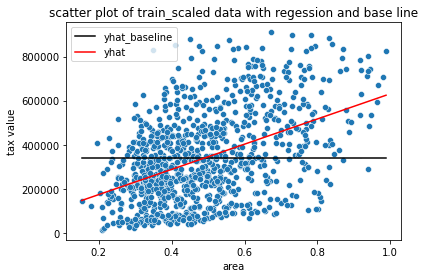

In [108]:
sns.scatterplot(data=train_scaled, x=single_var,y=pred_col)
sns.lineplot(data=train_scaled, x=single_var,y="yhat_baseline",color="black",label="yhat_baseline")
sns.lineplot(data=train_scaled, x=single_var,y="yhat",color="red",label="yhat")
plt.legend()
plt.title("scatter plot of train_scaled data with regession and base line")

In [109]:
train_scaled

,area,tax value,yhat_baseline,yhat
369012,0.649839,748602.0,337756.092,431134.832639
1616669,0.569709,90587.0,337756.092,385339.642758
1008997,0.374817,278807.0,337756.092,273955.005098
361981,0.358967,211457.0,337756.092,264896.615891
1737414,0.750514,566066.0,337756.092,488672.378900
...,...,...,...,...
612825,0.729968,573501.0,337756.092,476930.022520
1942014,0.253302,156537.0,337756.092,204507.354509
163610,0.579395,467064.0,337756.092,390875.325051
783877,0.458174,215330.0,337756.092,321595.422410


# Plot the residuals for the linear regression model that you made.


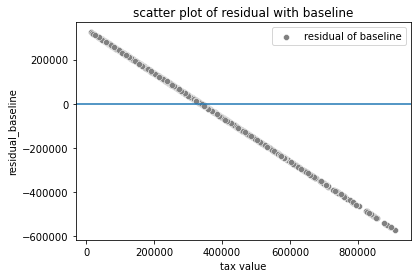

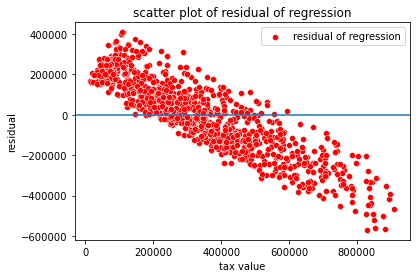

In [110]:

 
train_scaled["residual"] = train_scaled["yhat"] - train_scaled[pred_col]
train_scaled['residual_baseline'] = train_scaled['yhat_baseline'] - train_scaled[pred_col]

#sns.scatterplot(data=train_scaled, x=single_var,y=pred_col)
sns.scatterplot(data=train_scaled, x=pred_col,y="residual_baseline",color="grey",label="residual of baseline")
plt.axhline(y=0)
plt.legend()
plt.title("scatter plot of residual with baseline")
plt.show()

sns.scatterplot(data=train_scaled, x=pred_col,y="residual",color="red",label="residual of regression")
plt.axhline(y=0)
plt.legend()
plt.title("scatter plot of residual of regression")
plt.show()


# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [111]:
train_scaled['residual^2'] = train_scaled.residual ** 2
train_scaled['residual_baseline^2'] = train_scaled.residual_baseline ** 2

ESS = sum((train_scaled["yhat"] - train_scaled[pred_col].mean())**2)
print("ESS (explained sum of squares) = ", ESS)

SSE = sum(train_scaled['residual^2'])
print("SSE (sum of squared errors) = ", SSE)

MSE = SSE/len(train_scaled)
print("MSE (mean squared error) = ", MSE)

RMSE = (MSE)**.5
print("RMSE (root mean squared error) = ", RMSE)


ESS (explained sum of squares) =  8510925477548.0625
SSE (sum of squared errors) =  32379305553627.484
MSE (mean squared error) =  32379305553.627483
RMSE (root mean squared error) =  179942.50624470995


# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).


In [112]:
ESS_baseline = sum((train_scaled["yhat_baseline"] - train_scaled[pred_col].mean())**2)
print("ESS baseline = ", ESS_baseline)

SSE_baseline = sum(train_scaled['residual_baseline^2'])
print("SSE baseline = ", SSE_baseline)

MSE_baseline = SSE_baseline/len(train_scaled)
print("MSE baseline = ", MSE_baseline)

RMSE_baseline = (MSE_baseline)**.5
print("RMSE baseline = ", RMSE_baseline)

ESS baseline =  0.0
SSE baseline =  40890231031175.58
MSE baseline =  40890231031.175575
RMSE baseline =  202213.33049820326


# Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [113]:
if SSE < SSE_baseline:
    print("OSL model performed better than baseline")
else:
    print("OSL model performed worse than baseline")

OSL model performed better than baseline


# What is the amount of variance explained in your model?


In [114]:
TSS = ESS + SSE ## TSS = TOTAL SUM OF SQUARES (EXPLAINED PLUS ERROR)
R2 = ESS/TSS ## RATIO
print(f"Percent of variance in tax value explained by area = ", round(R2*100,1), "%")

Percent of variance in tax value explained by area =  20.8 %


#Is your model better than the baseline model?


In [115]:
TSS_baseline = ESS_baseline + SSE_baseline ## TSS = TOTAL SUM OF SQUARES (EXPLAINED PLUS ERROR)
R2_baseline = ESS_baseline/TSS_baseline ## RATIO
print(f"Percent of baseline variance in tax value explained by area = ", round(R2_baseline*100,1), "%")

if R2 > R2_baseline:
    print("OSL model performed better than baseline")
else:
    print("OSL model performed worse than baseline")

Percent of baseline variance in tax value explained by area =  0.0 %
OSL model performed better than baseline


In [116]:
evs = explained_variance_score(train_scaled[[pred_col]], train_scaled["yhat"])
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.208


# Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): 
- creates a residual plot

regression_errors(y, yhat): 
**returns the following values:**
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
    
baseline_mean_errors(y): 
- computes the SSE, 
- MSE, 
- and RMSE for the baseline model

better_than_baseline(y, yhat): 
- returns true if your model performs better than the baseline, otherwise false

SSE baseline =  40890231031175.58
MSE baseline =  40890231031.175575
RMSE baseline =  202213.33049820326


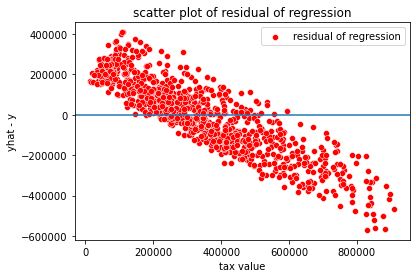

SSE (sum of squared errors) =  32379305553627.484
ESS (explained sum of squares) =  8510925477548.0625
TSS (Total sum of squares) =  40890231031175.55
MSE (mean squared error) =  32379305553.627483
RMSE (root mean squared error) =  179942.50624470995
Percent of variance in tax value explained by area =  20.8 %
SSE (sum of squared errors) =  32379305553627.484
ESS (explained sum of squares) =  8510925477548.0625
TSS (Total sum of squares) =  40890231031175.55
MSE (mean squared error) =  32379305553.627483
RMSE (root mean squared error) =  179942.50624470995
Percent of variance in tax value explained by area =  20.8 %
SSE baseline =  40890231031175.58
MSE baseline =  40890231031.175575
RMSE baseline =  202213.33049820326
model performed better than baseline on SSE
model performed better than baseline on MSE
model performed better than baseline on RMSE


True

In [117]:
evaluate.baseline_mean_errors(train_scaled[pred_col])
evaluate.plot_residuals(train_scaled[pred_col],train_scaled.yhat)
evaluate.regression_errors(train_scaled[pred_col],train_scaled.yhat)
evaluate.better_than_baseline(train_scaled[pred_col], train_scaled["yhat"])

In [118]:
SSE2 = mean_squared_error(train_scaled[pred_col],train_scaled["yhat"])*len(train_scaled)
SSE2_baseline = mean_squared_error(train_scaled[pred_col],train_scaled["yhat_baseline"])*len(train_scaled)
SSE2,SSE2_baseline

## SSE sum of squares is taking the variation between the yhat/yhatbaseline and each point (residual), squaring the distance of each and summing them.
## TSS total sum of squares is the sum of the difference between the actual data and the mean of that data

(32379305553627.473, 40890231031175.53)